# Navigation

---

The first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) using [PyTorch](http://docs.pytorch.org/), [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

## Notebook Initialization

In [1]:
from unityagents import UnityEnvironment
import torch
import os, numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from agents.agent import *
from agents.trainer import *
from utils.viz_utils import plot_scores, plot_rolling_scores

- **Mac**: `"path/to/Banana.app"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

In [3]:
#env = UnityEnvironment(file_name="Banana_Linux_NoVis/Banana.x86_64", no_graphics=True)
#env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")
#env = UnityEnvironment(file_name="Banana.app")
fname = "assets/Banana_Linux_NoVis/Banana.x86_64"
# fname = "assets/Banana_Linux/Banana.x86_64"
# fname = "assets/Banana.app"

In [4]:
logdir = 'logdir/vector_navigation/'

agent_config = {
    'agentClass': BaseAgent,
    'filepath': 'baseAgent_qNet64x64_t3',
    'seed': 0
}

env_config = {
    #'env_type': 'unity',
    'file_name': fname,
    'no_graphics': True,
    'seed': 0, 
    'train_mode': True, 
    'logdir': logdir,
    'agent_config': agent_config
}

In [5]:
agent, brain_name, env = build_unity(**env_config)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


# Train the agent

In [6]:
training_config = {
    'agent': agent, 
    'brain_name': brain_name, 
    'env': env, 
    'visual': False, 
    'training': True, 
    'n_episodes': 2000, 
    'max_t': 1000, 
    'target_reward': 13.,
    'logdir': logdir, 
    'shift': (-.5,.5),
    'show': False, 
    'save': True,
    'close': False
}

In [7]:
scores = train_unity(**training_config)

Initialized time step
Episode 100	Average Score: 1.10	Agent Epsilon: 0.61
Episode 200	Average Score: 4.98	Agent Epsilon: 0.37
Episode 300	Average Score: 8.15	Agent Epsilon: 0.22
Episode 400	Average Score: 11.02	Agent Epsilon: 0.13
Episode 481	Average Score: 13.03	Agent Epsilon: 0.09
Environment solved in 381 episodes!	Average Score: 13.03
Directory created: logdir/vector_navigation/baseAgent_qNet64x64_t3_@target(13.0)in481eps/
Directory created: logdir/vector_navigation/baseAgent_qNet64x64_t3/
Agent saved to logdir/vector_navigation/baseAgent_qNet64x64_t3_@target(13.0)in481eps.


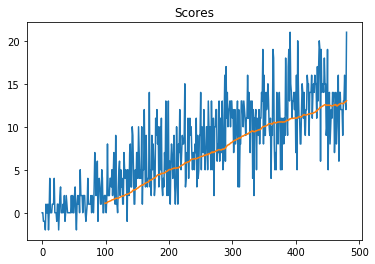

In [8]:
plot_rolling_scores(scores);

# Hyperparameters, Learning Algorithm and Network Architecture


In [9]:
agent.__dict__

{'state_size': 37,
 'action_size': 4,
 'batch_size': 64,
 'memory_size': 100000,
 'reward_window': 100,
 'gamma': 0.99,
 'tau': 0.001,
 'epsilon': 0.08972259762946533,
 'epsilon_start': 1.0,
 'epsilon_end': 0.01,
 'epsilon_decay': 0.995,
 'learning_rate': 0.0005,
 'network_update': 4,
 'filepath': 'logdir/vector_navigation/baseAgent_qNet64x64_t3',
 'seed': 0,
 'kwargs': {},
 'memory': <memory.BaseMemory at 0x7f40e0ca1a20>,
 'qnetwork_online': QNetwork(
   (fc1): Linear(in_features=37, out_features=64, bias=True)
   (fc2): Linear(in_features=64, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=4, bias=True)
 ),
 'qnetwork_internal': QNetwork(
   (fc1): Linear(in_features=37, out_features=64, bias=True)
   (fc2): Linear(in_features=64, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=4, bias=True)
 ),
 'optimizer': Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     eps: 1e-08
     lr: 0.0005
     weight_decay: 0
 